In [1]:
import os 
import findspark 


import pyspark
# for sql
from pyspark.sql import SparkSession 
from pyspark.sql.functions import col
from pyspark.sql.functions import sum,avg,max,count
from pyspark import SparkContext

# for time 
import time 
import datetime as dt
from pyspark.sql import functions as F

In [2]:
task1 = "../../data/task1.csv"
task2 = "../../data/task2.csv"
task3 = "../../data/task3.csv"
task4 = "../../data/task4.csv"
task5 = "../../data/task5.csv"
task6 = "../../data/task6.csv"
task7 = "../../data/task7.csv"

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .config("spark.driver.cores",16) \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()

# Data Scalability

## Task 1 is 1,000 rows data

In [4]:
# Read CSV file
df_task1 = spark.read.csv(task1, header=True, inferSchema=True)

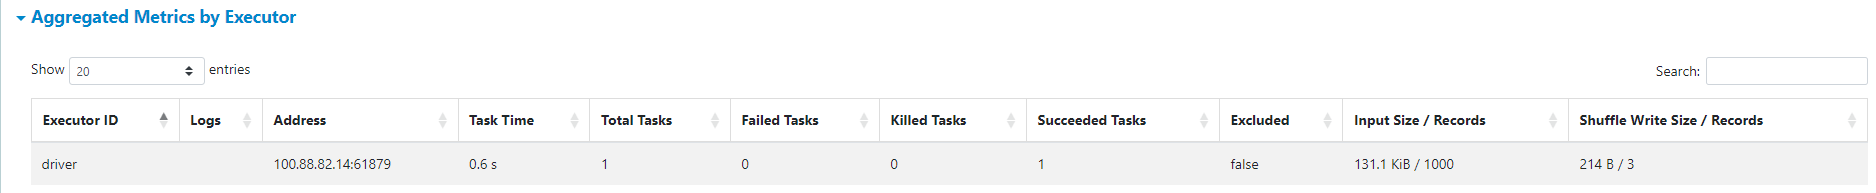

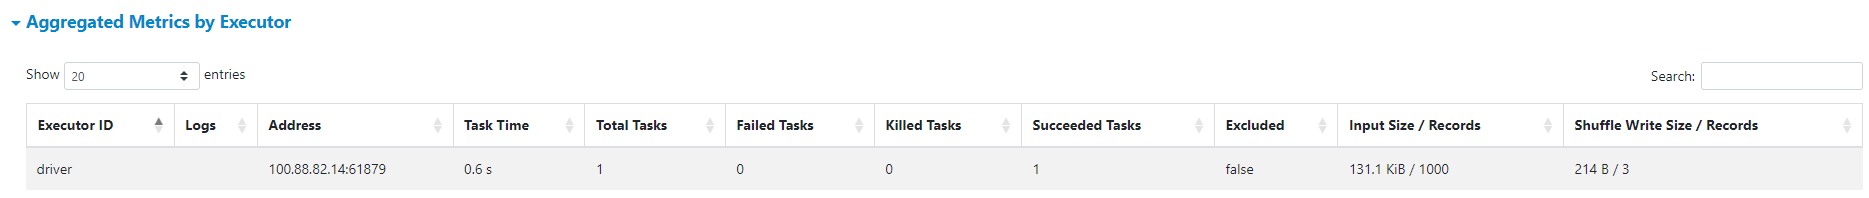

In [5]:
task1_groupby = df_task1.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase|   10|
|      view|  987|
|      cart|    3|
+----------+-----+



## Task 2 is 10,000 rows data

In [4]:
# Read CSV file
df_task2 = spark.read.csv(task2, header=True, inferSchema=True)


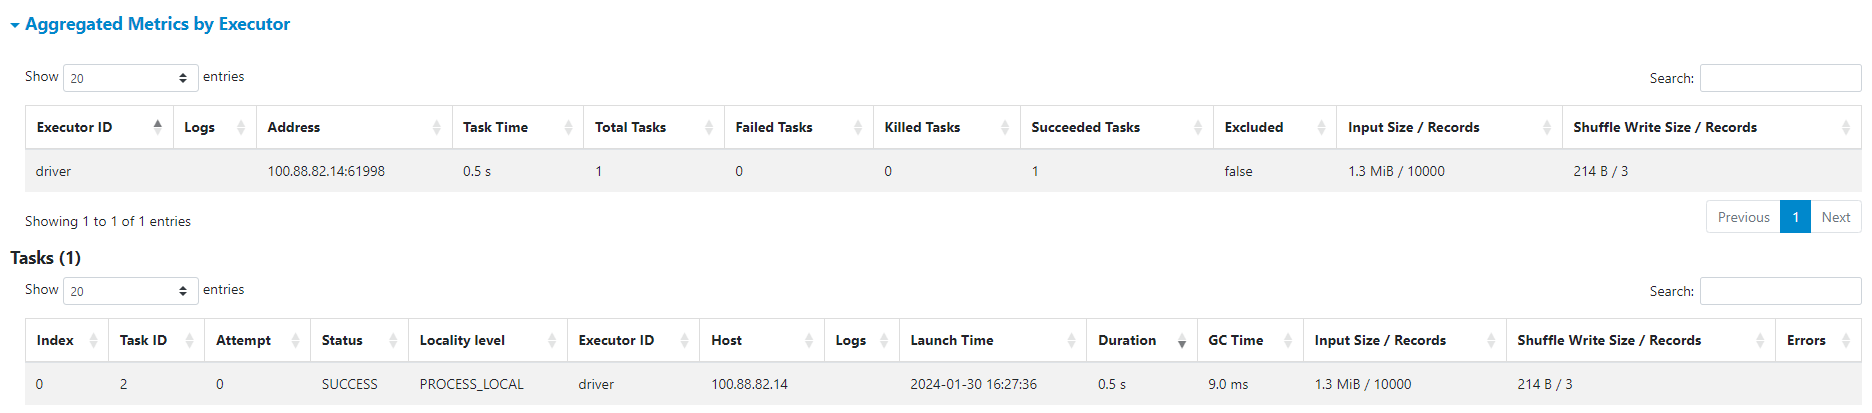

In [5]:
task2_groupby = df_task2.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase|  118|
|      view| 9785|
|      cart|   97|
+----------+-----+



## Task 3 is 100,000 rows data

In [4]:
# Read CSV file
df_task3 = spark.read.csv(task3, header=True, inferSchema=True)


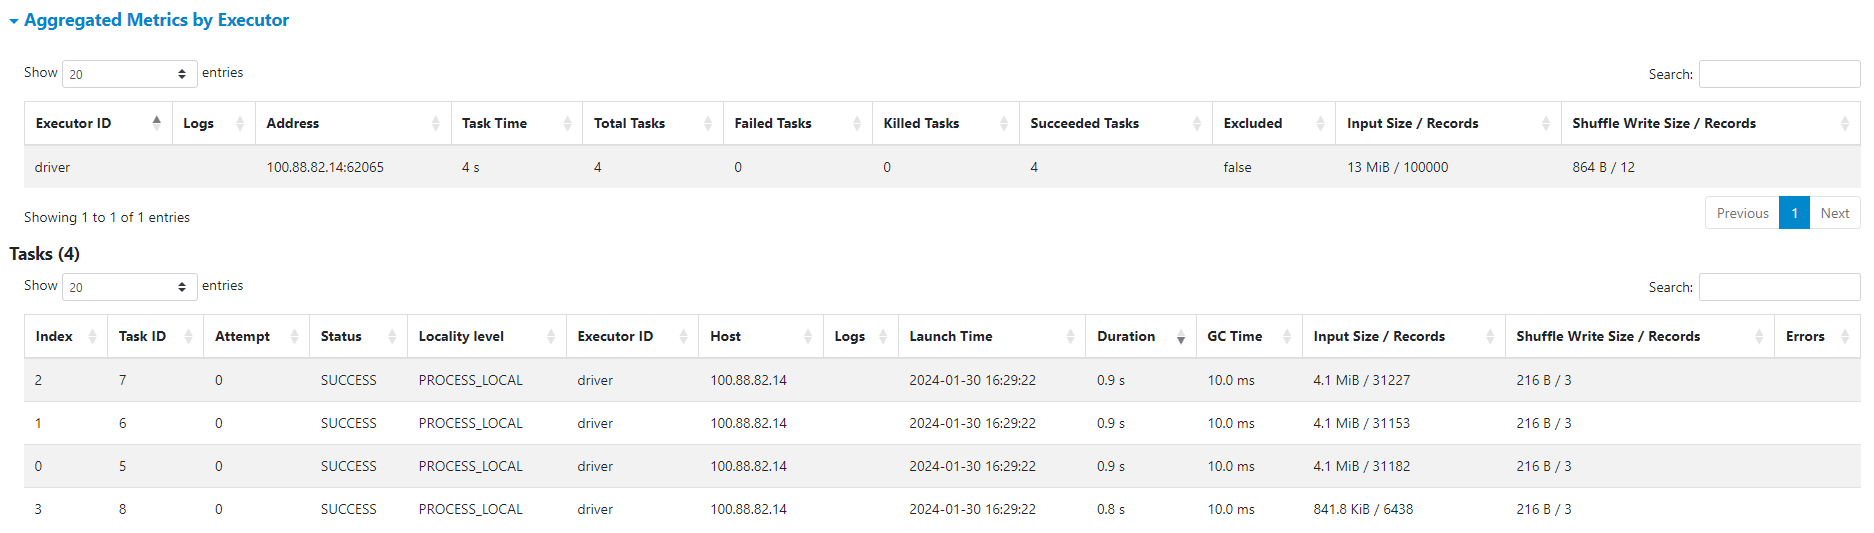

In [5]:
task3_groupby = df_task3.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase| 1655|
|      view|97130|
|      cart| 1215|
+----------+-----+



## Task 4 is 1,000,000 rows data

In [4]:
# Read CSV file
df_task4 = spark.read.csv(task4, header=True, inferSchema=True)

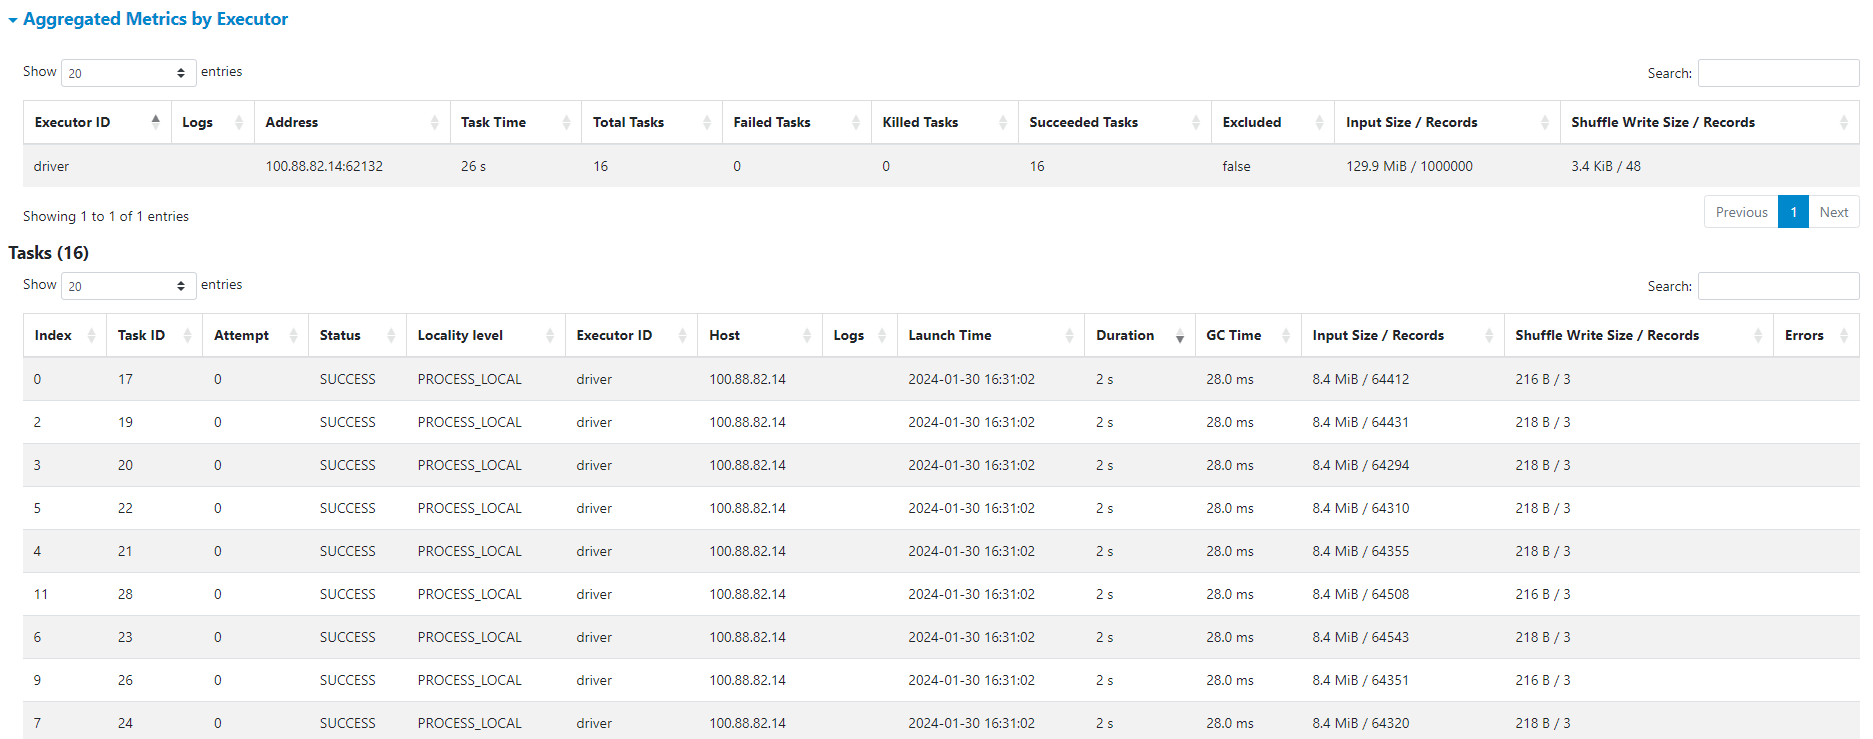

In [5]:
task4_groupby = df_task4.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+------+
|event_type| count|
+----------+------+
|  purchase| 16848|
|      view|968513|
|      cart| 14639|
+----------+------+



## Task 5 is 10,000,000 rows data

In [4]:
# Read CSV file
df_task5 = spark.read.csv(task5, header=True, inferSchema=True)

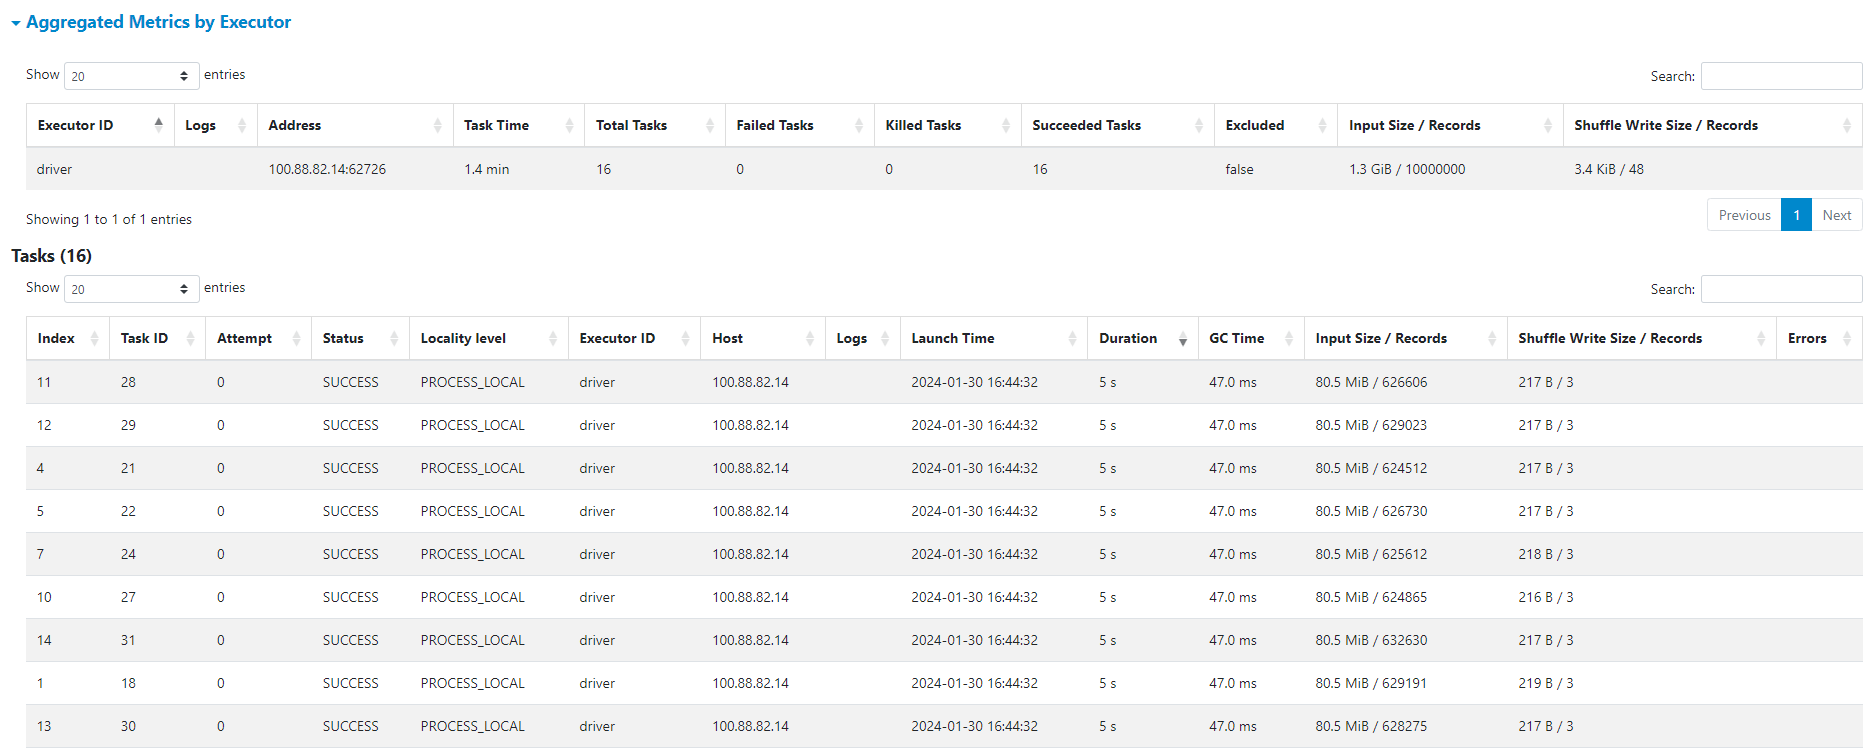

In [5]:
task5_groupby = df_task5.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-------+
|event_type|  count|
+----------+-------+
|  purchase| 172826|
|      view|9627820|
|      cart| 199354|
+----------+-------+



## Task 6 is 20,000,000 rows data

In [4]:
df_task6 = spark.read.csv(task6, header=True, inferSchema=True)

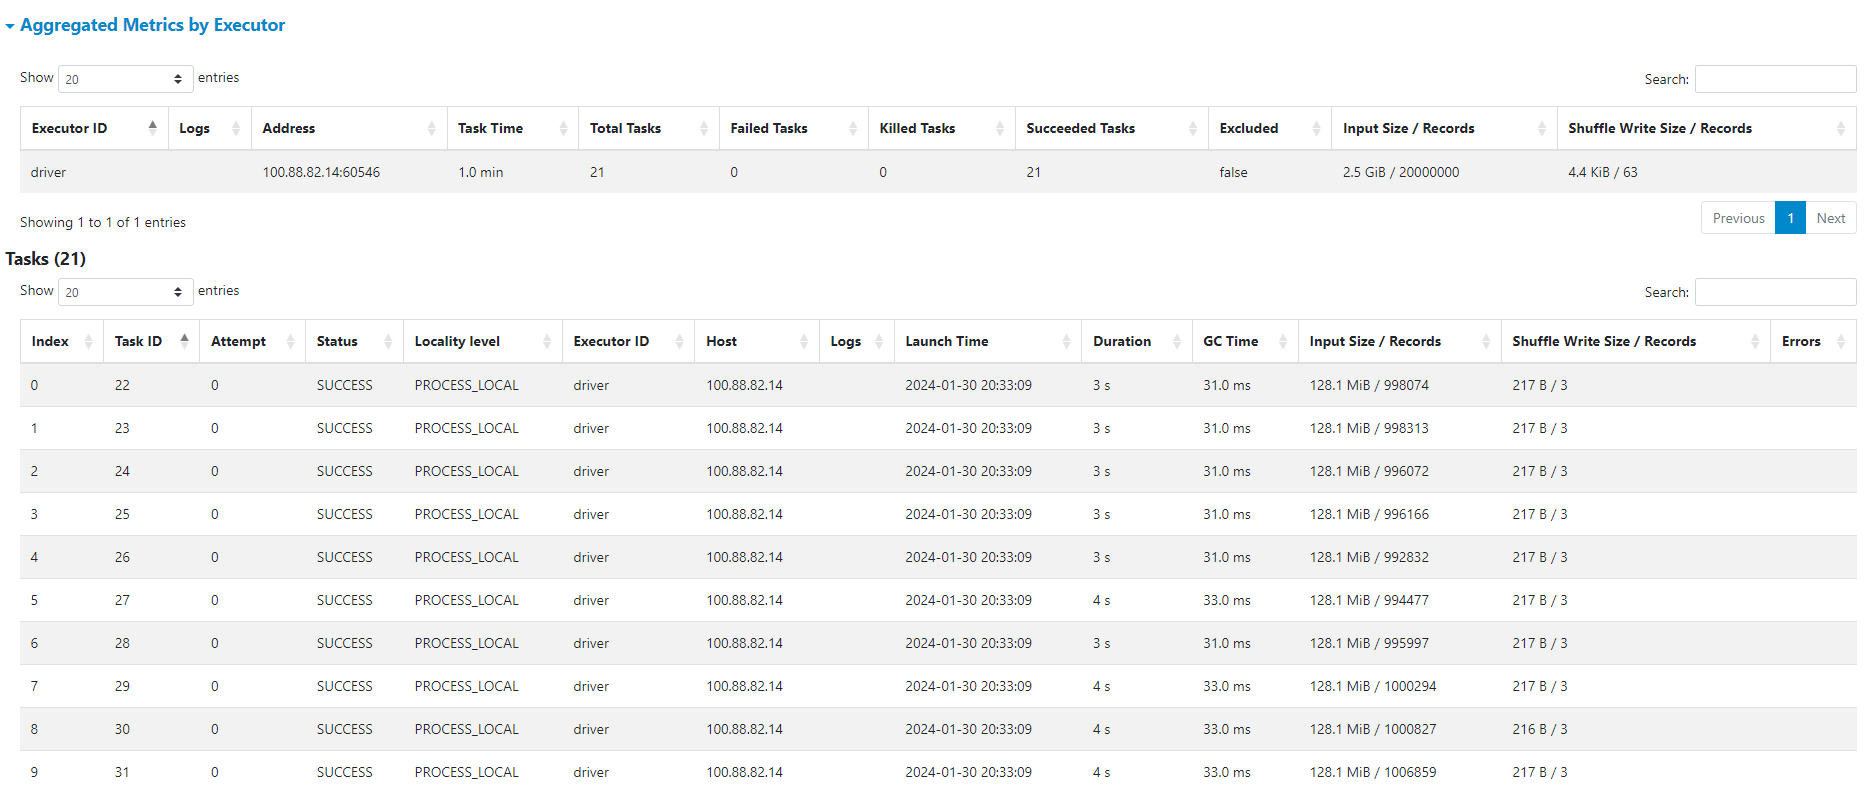

In [5]:
task6_groupby = df_task6.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  349700|
|      view|19259848|
|      cart|  390452|
+----------+--------+



## Task 7 is 100,000,000 rows data

In [4]:
df_task7 = spark.read.csv(task7, header=True, inferSchema=True)

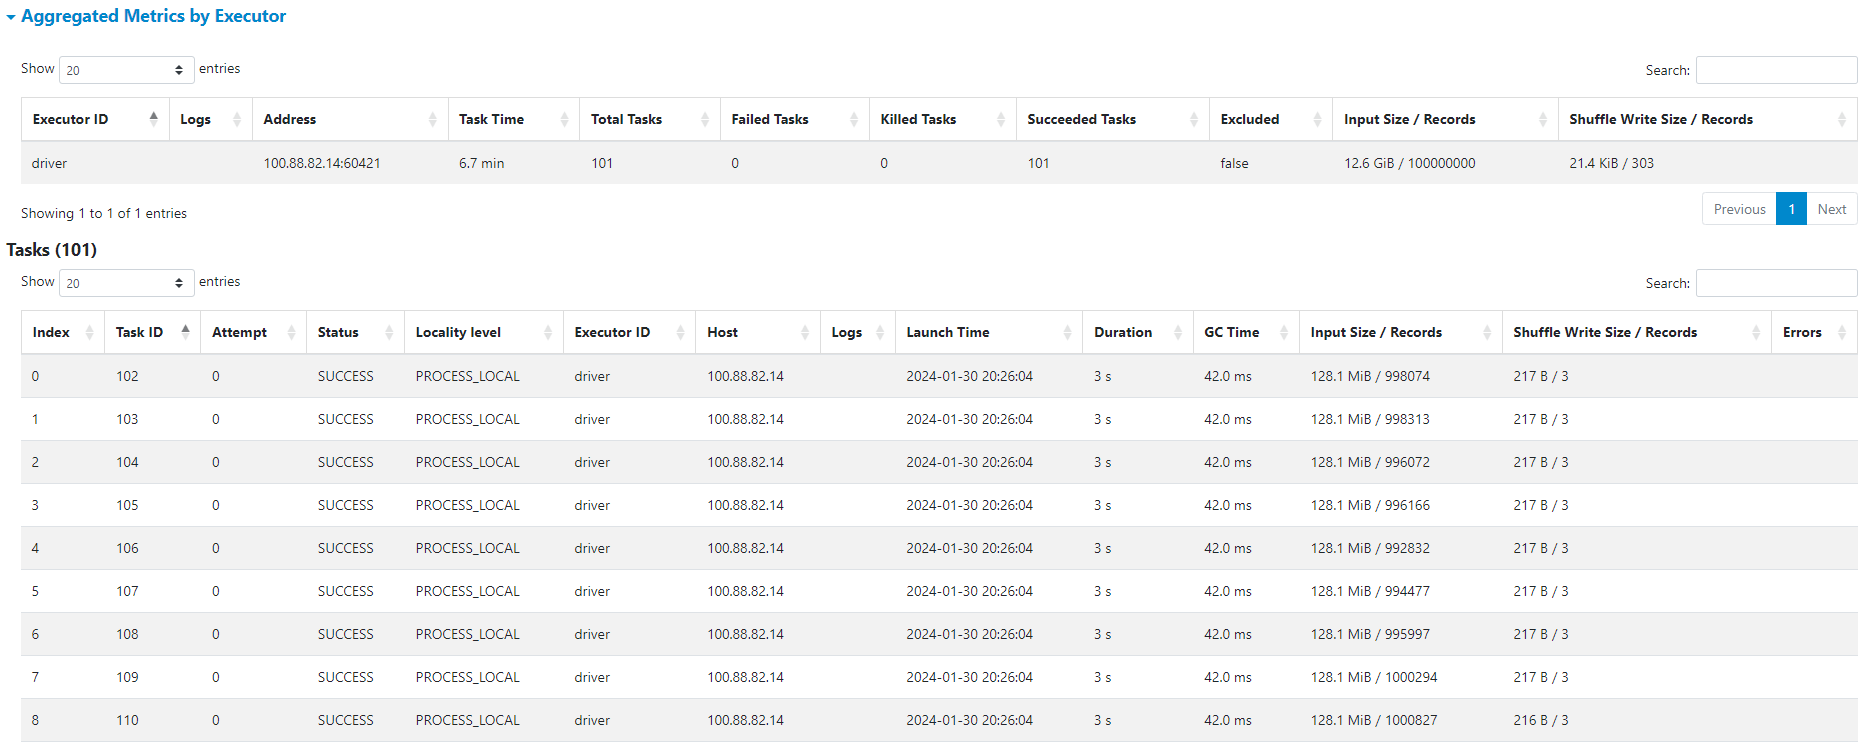

In [6]:
task7_groupby = df_task7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



# Hardware Scalability

## Initialize SparkSession with 4 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .master("local[4]") \
    .getOrCreate()
 
    #  .config("spark.cores.max configuration",4)\
    # .config("spark.deploy.defaultCores",4)\
    # .config("spark.driver.cores",4)\
    # .config("spark.executor.cores",4)\
    # .config("spark.sql.shuffle.partitions", 4) \

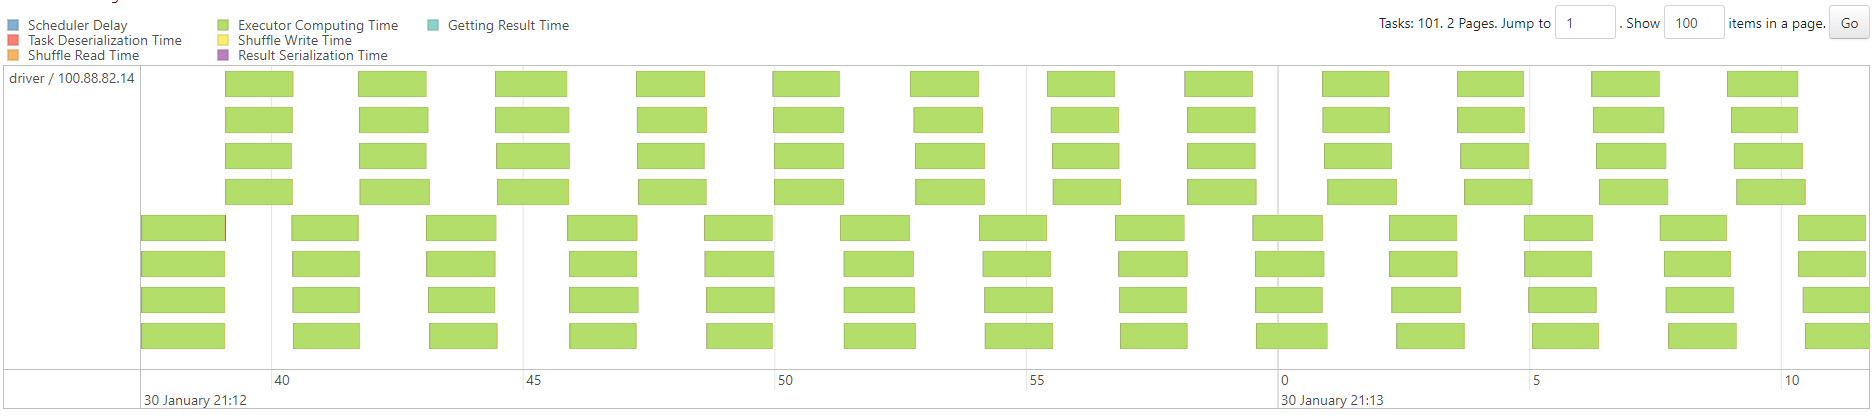

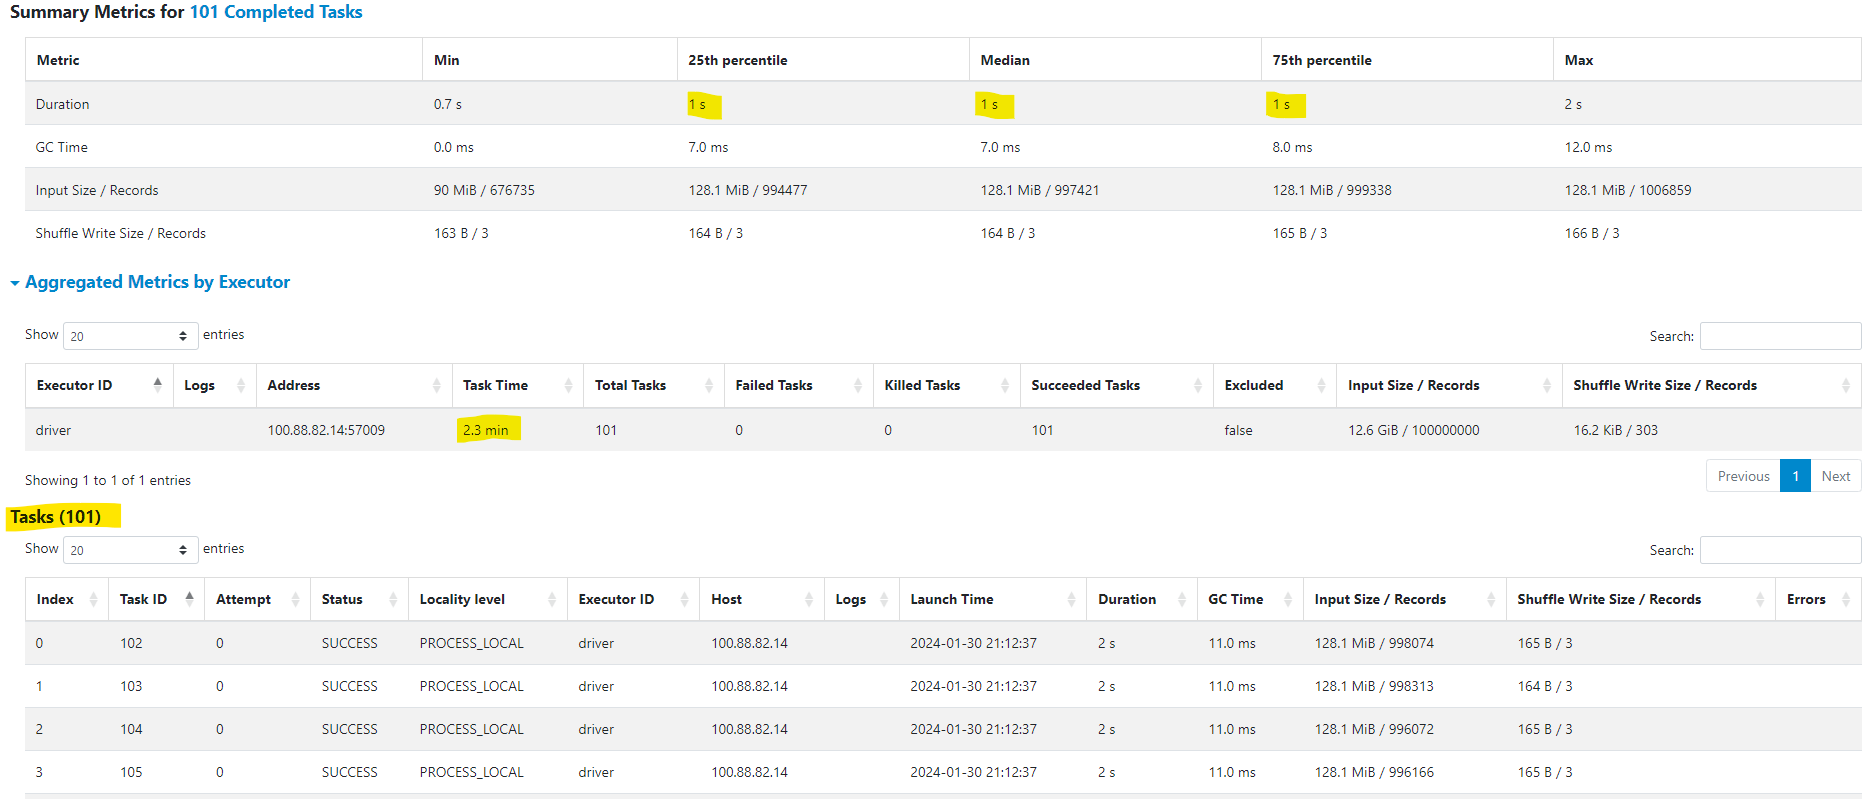

In [4]:
# Read CSV file
df_task7 = spark.read.csv(task7, header=True, inferSchema=True)

In [5]:
task7_groupby = df_task7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      cart| 2538550|
|      view|95743263|
+----------+--------+



## Initialize SparkSession with 16 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[16]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()
 

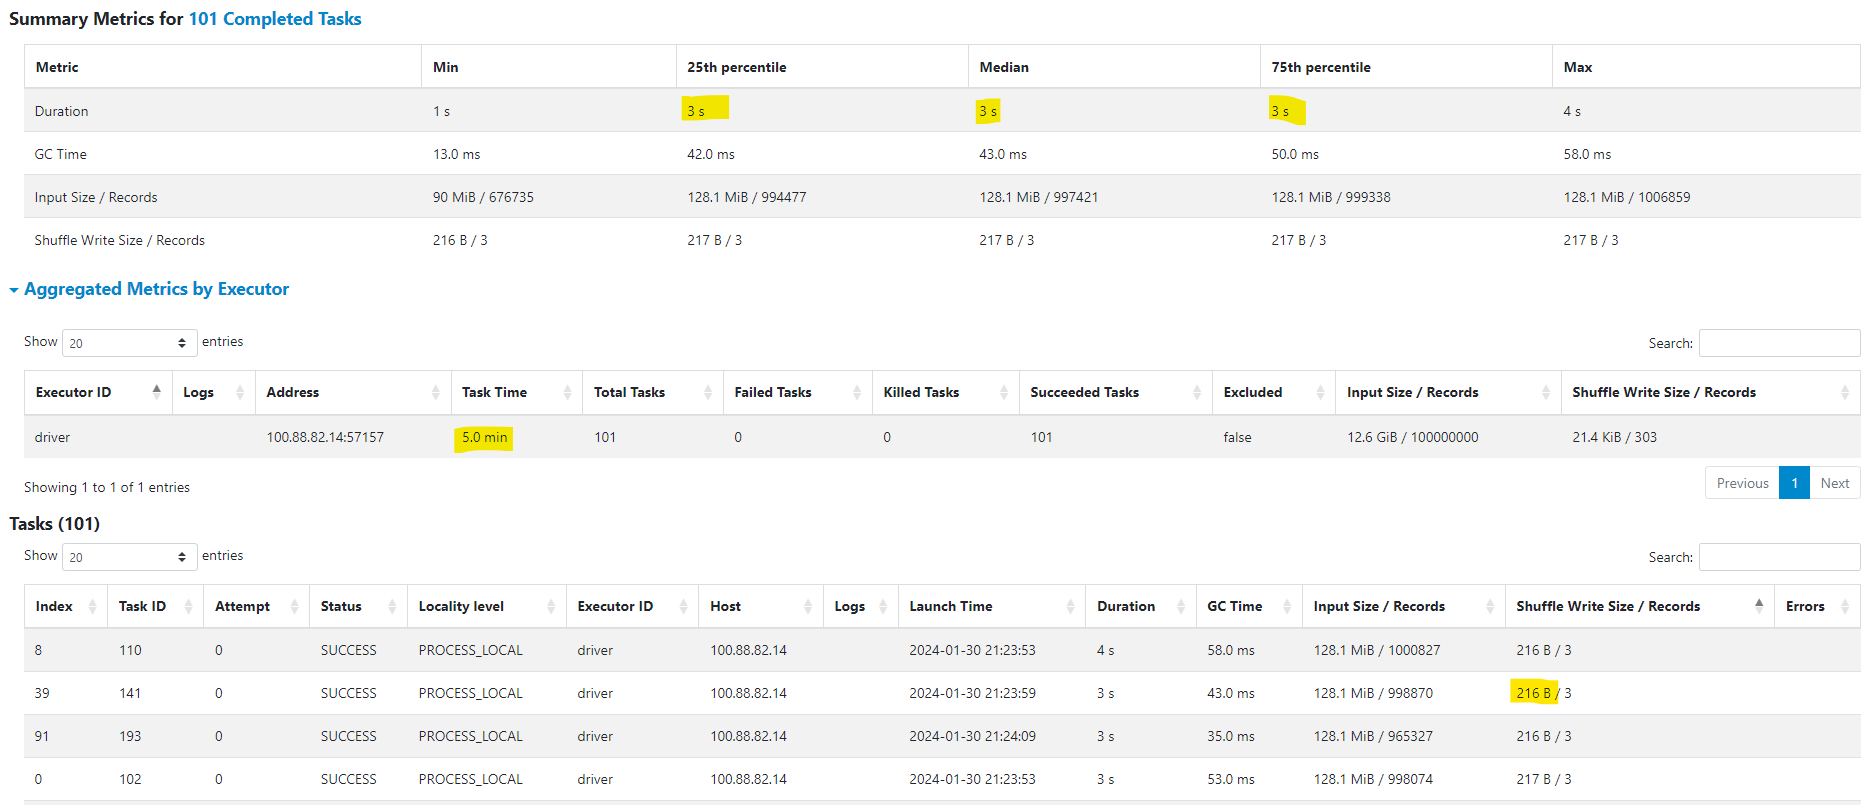

In [4]:
# Read CSV file
df_task7 = spark.read.csv(task7, header=True, inferSchema=True)

In [5]:
task7_groupby = df_task7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



## Initialize SparkSession with 1 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[1]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()

In [4]:
# Read CSV file
df_task7 = spark.read.csv(task7, header=True, inferSchema=True)

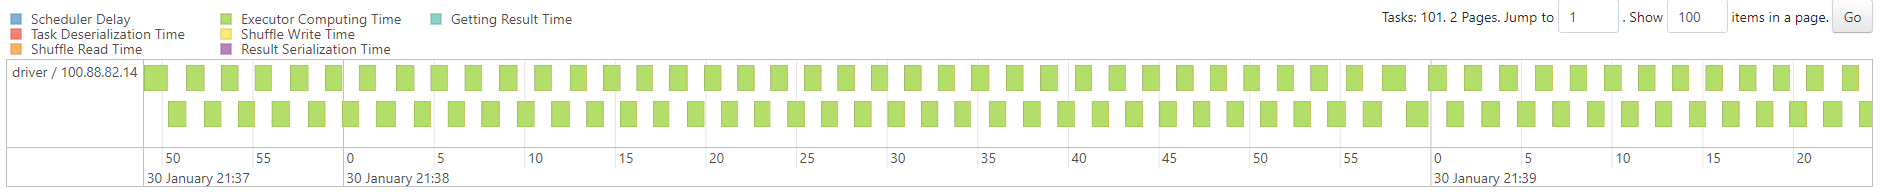

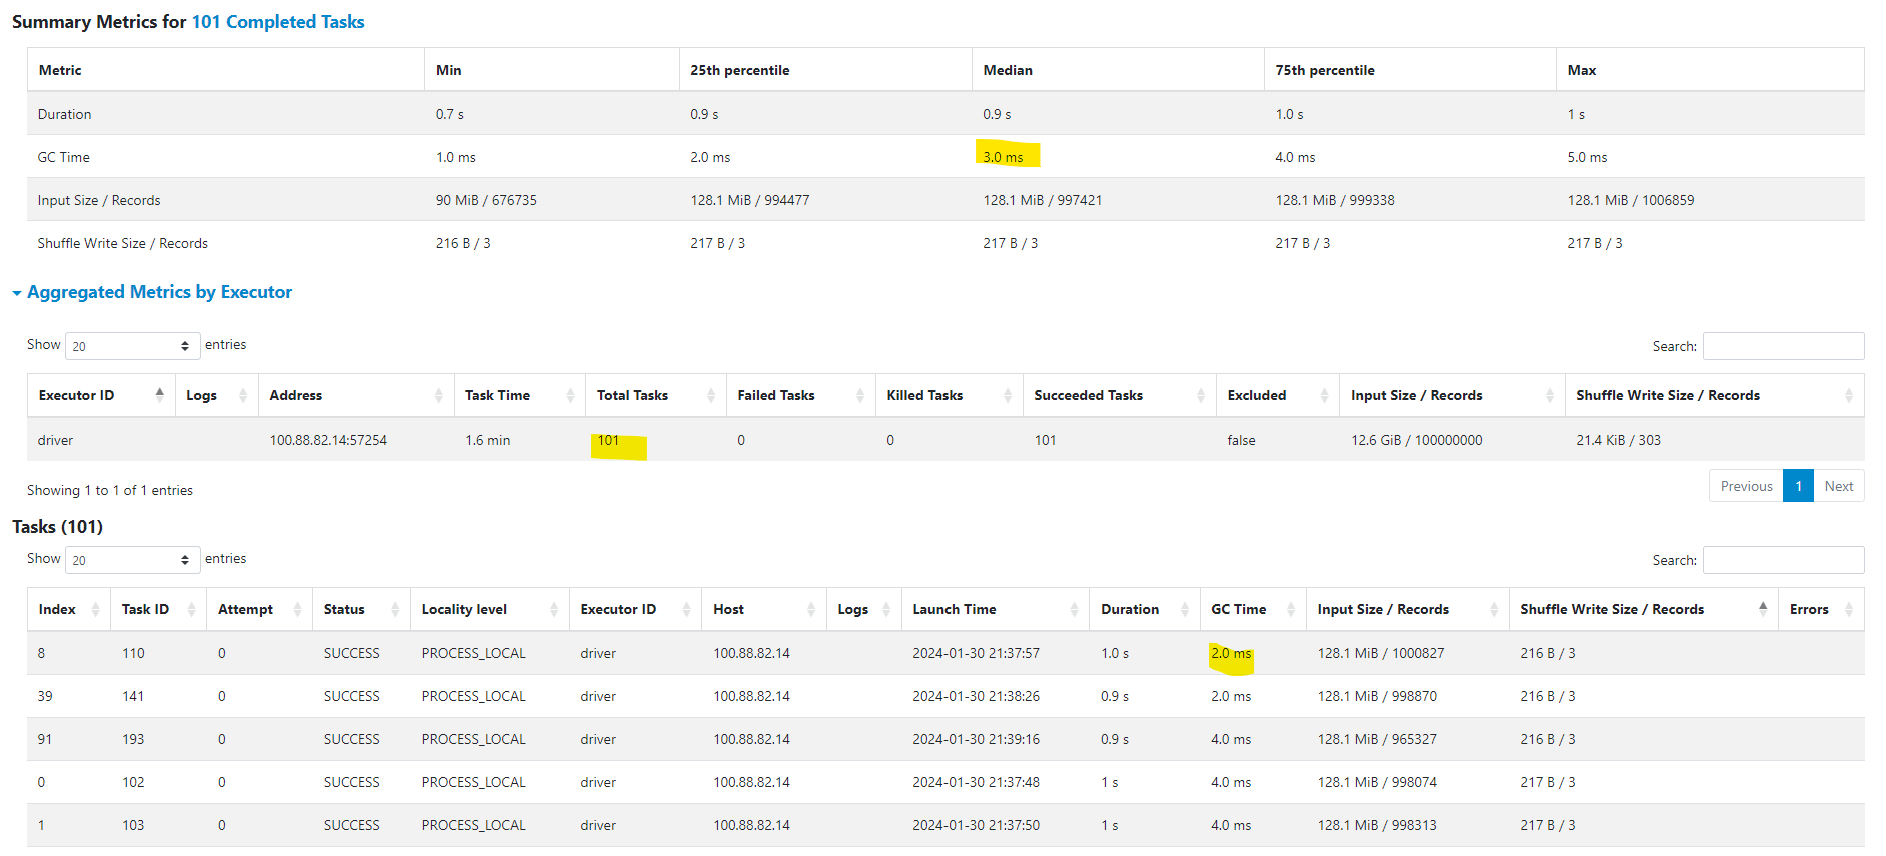

In [5]:
task7_groupby = df_task7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



- Long GC times are usually due to insufficient memory
- The process of automatic memory management. When the objects in the program are no longer needed, the GC process will automatically release the memory.


## Initialize SparkSession with 1 cores and 8GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[1]") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "8g") \
    .getOrCreate()

In [4]:
# Read CSV file
df_task7 = spark.read.csv(task7, header=True, inferSchema=True)

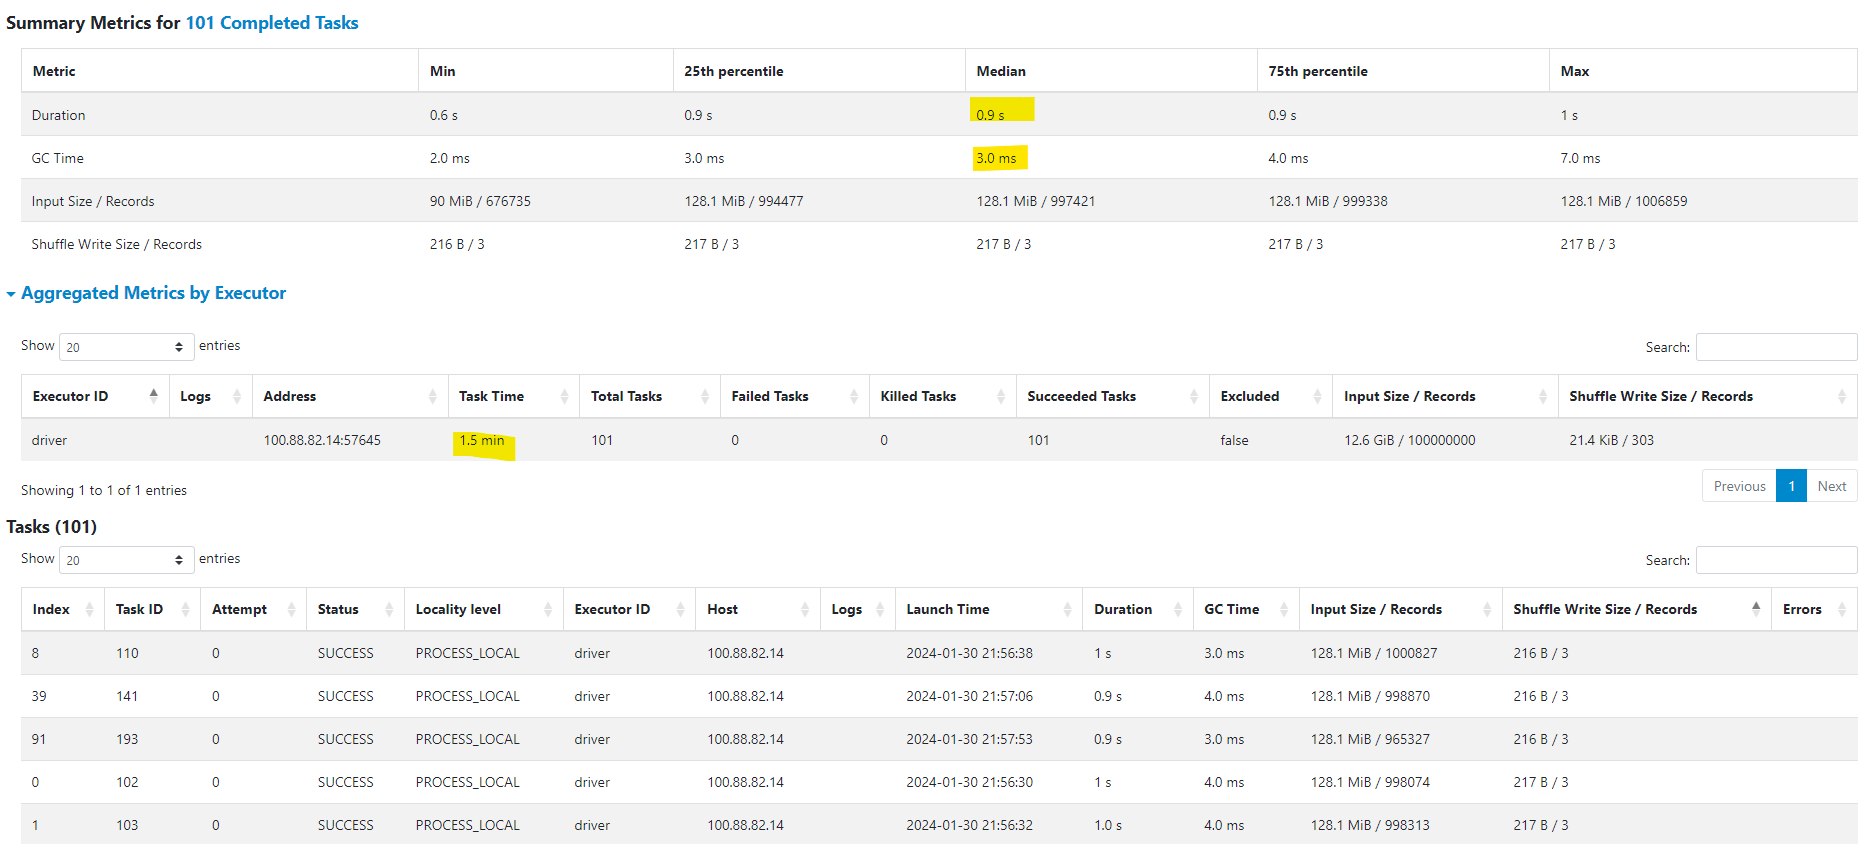

In [5]:
task7_groupby = df_task7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



## Initialize SparkSession with 1 cores and 1GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[1]") \
    .config("spark.executor.memory", "1g") \
    .config("spark.driver.memory", "1g") \
    .getOrCreate()

In [4]:
# Read CSV file
df_task7 = spark.read.csv(task7, header=True, inferSchema=True)

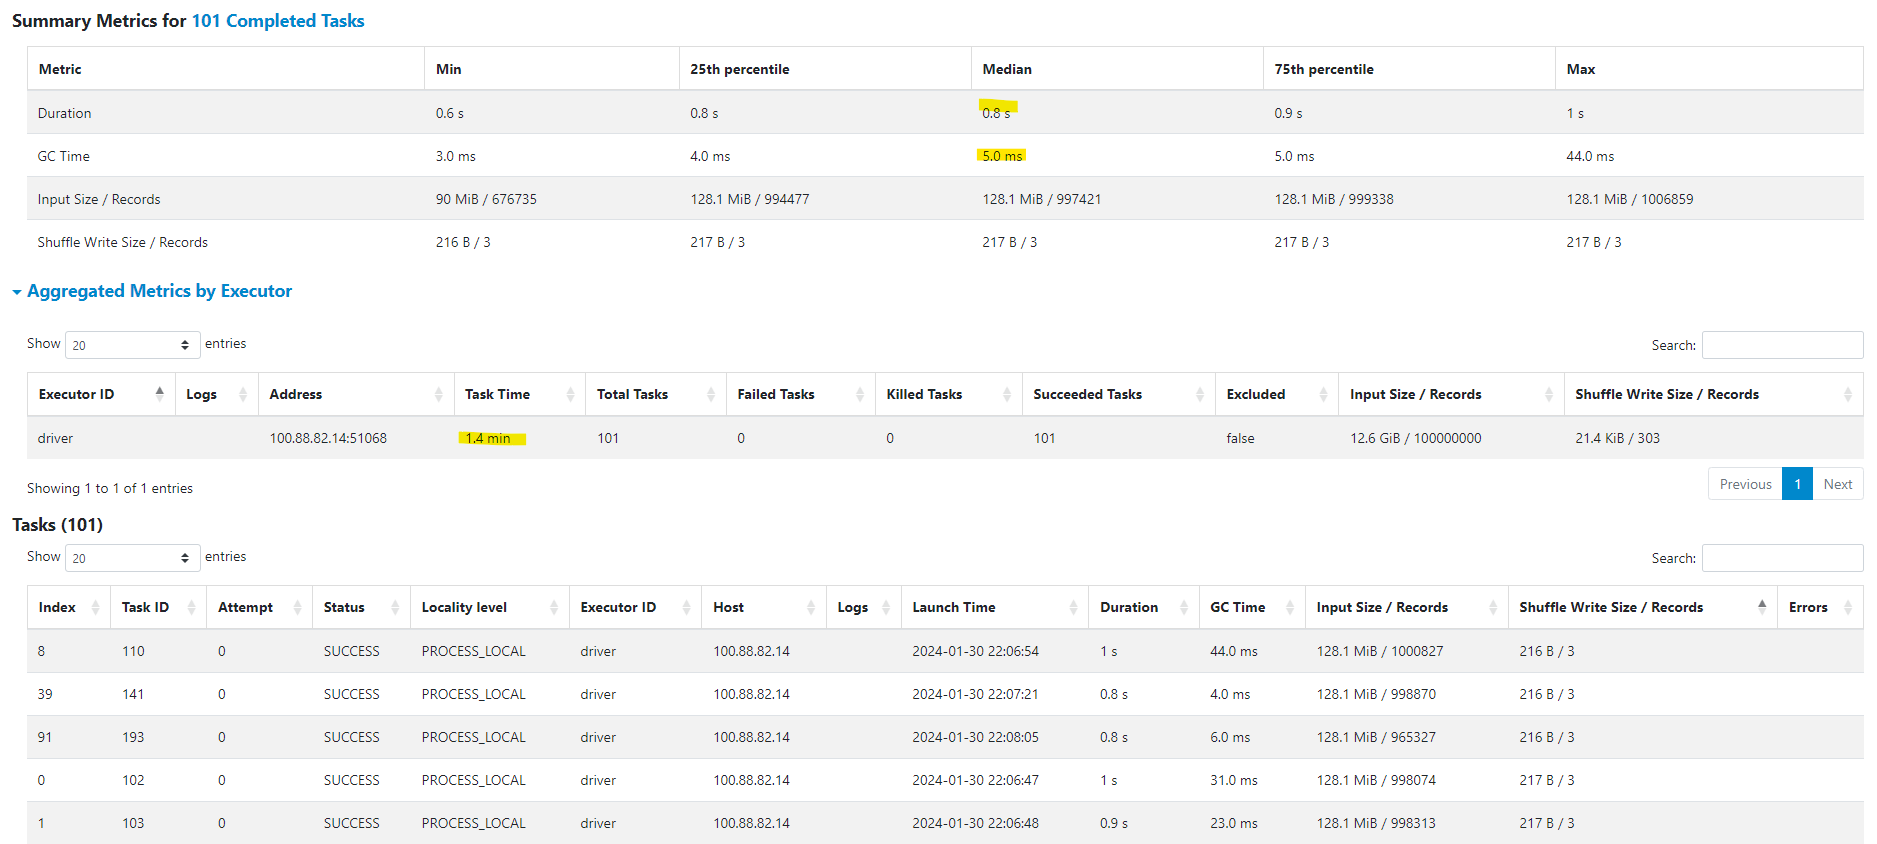

In [5]:
task7_groupby = df_task7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+

